---
# Feature Engineering
---
In this notebook, ...


## Results

---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.preprocessing import StandardScaler

### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned.xlsx')
churn_df

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,1,86,3239,Competitors
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,Electronic check,70.70,1,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,1,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,1,89,5340,Competitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,92285,34.341737,-116.539416,Female,No,No,No,72,Yes,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,0,45,5306,Not applicable
7039,Adelanto,92301,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,0,59,2140,Not applicable
7040,Amboy,92304,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,0,71,5560,Not applicable
7041,Angelus Oaks,92305,34.167800,-116.864330,Female,No,Yes,Yes,11,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,0,59,2793,Not applicable


### List of columns to work with

In [3]:
col2discard = ['City', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
               'Phone Service', 'Multiple Lines', 'Streaming TV', 
               'Streaming Movies', 'Churn Reason', 'Churn Score',
               'CLTV']

col2keep = ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 
            'Internet Service', 
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method',
            'Monthly Charges', 'Churn Value']


col2encode = ['Senior Citizen', 'Partner', 'Dependents', 
              'Internet Service', 
              'Online Security', 'Online Backup', 'Device Protection',
              'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method']

---
### Removing unecessary columns
---

I will be removing the availability_date column, since I don't believe that this can affect the price.

In [4]:
churn_df = churn_df.drop(columns = col2discard)

churn_df.head(5)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Churn Value
0,No,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,1
1,No,No,Yes,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1
2,No,No,Yes,8,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,1
3,No,Yes,Yes,28,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,1
4,No,No,Yes,49,Fiber optic,No,Yes,Yes,No,Month-to-month,Yes,Bank transfer (automatic),103.70,1


---

### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are eleven category columns.
  * Senior Citizen
  * Partner
  * Dependents
  * Internet Service
  * Online Security
  * Online Backup
  * Device Protection
  * Tech Support
  * Contract
  * Paperless Billing
  * Payment Method


In [5]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) 

# Encode the categorical columns
encoded_cols = encoder.fit_transform(churn_df[col2encode])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(col2encode))

# Removing categorical columns
churn_df = churn_df.drop(columns=col2encode)

# Join encoded dataframe to the rent_df dataframe
churn_df = churn_df.join(tmp_df)

churn_df.head(5)

,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_Yes,Online Backup_Yes,Device Protection_Yes,Tech Support_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,70.70,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,8,99.65,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,28,104.80,1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49,103.70,1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


---
### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**

![Correlation Heatmap](../graph/Correlation_heatmap.png)


#### Conclusion :

- 'Montlhy Charges' are highly correlated with 'Internet Service_Fiber optic' and 'Internet Service_No'. To evaluate the impact of the correlation between these columns, we need test
    1. The model with all three features ('Montlhy Charges', 'Internet Service_Fiber optic', 'Internet Service_No')
    2. With only one of those 3 features ('Internet Service_Fiber optic') 
- The correlation of each feature with Churn Value
| Column Name | Absolute Correlation with Churn Value |
| ----------- | :-----------------------------------: |
| Tenure Months	| 0.35 |
| Internet Service_Fiber optic |	0.31 |
| Contract_Two year |	0.30 |
| Payment Method_Electronic check |	0.30 |
| Dependents_Yes |	0.25 |
| Internet Service_No |	0.23 |
| Monthly Charges |	0.19 |
| Paperless Billing_Yes |	0.19 |
| Contract_One year |	0.18 |
| Online Security_Yes |	0.17 |
| Tech Support_Yes |	0.16 |
| Senior Citizen_Yes | 	0.15 |
| Partner_Yes |	0.15 |
| Payment Method_Credit card (automatic) |	0.13 |
| Payment Method_Mailed check |	0.09 |
| Online Backup_Yes |	0.08 | 
| Device Protection_Yes |	0.07 |





In [6]:
# Compute correlation
corr = churn_df.select_dtypes(include=[float, int, bool]).corr()

In [7]:
pd.DataFrame(corr['Churn Value']).sort_values(by='Churn Value', ascending=False)

,Churn Value
Churn Value,1.000000
Internet Service_Fiber optic,0.308020
Payment Method_Electronic check,0.301919
Monthly Charges,0.193356
Paperless Billing_Yes,0.191825
Senior Citizen_Yes,0.150889
Device Protection_Yes,-0.066160
Online Backup_Yes,-0.082255
Payment Method_Mailed check,-0.091683
Payment Method_Credit card (automatic),-0.134302


In [8]:
print(pd.DataFrame(abs(corr['Churn Value'])).sort_values(by='Churn Value', ascending=False).index)

corr_table = pd.DataFrame(abs(corr['Churn Value'])).sort_values(by='Churn Value', ascending=False).rename(columns={'Churn Value' : 'Absolute Correlation with Churn Value'})[1:]

corr_table

Index(['Churn Value', 'Tenure Months', 'Internet Service_Fiber optic',
       'Contract_Two year', 'Payment Method_Electronic check',
       'Dependents_Yes', 'Internet Service_No', 'Monthly Charges',
       'Paperless Billing_Yes', 'Contract_One year', 'Online Security_Yes',
       'Tech Support_Yes', 'Senior Citizen_Yes', 'Partner_Yes',
       'Payment Method_Credit card (automatic)', 'Payment Method_Mailed check',
       'Online Backup_Yes', 'Device Protection_Yes'],
      dtype='object')


,Absolute Correlation with Churn Value
Tenure Months,0.352229
Internet Service_Fiber optic,0.308020
Contract_Two year,0.302253
Payment Method_Electronic check,0.301919
Dependents_Yes,0.248542
Internet Service_No,0.227890
Monthly Charges,0.193356
Paperless Billing_Yes,0.191825
Contract_One year,0.177820
Online Security_Yes,0.171226


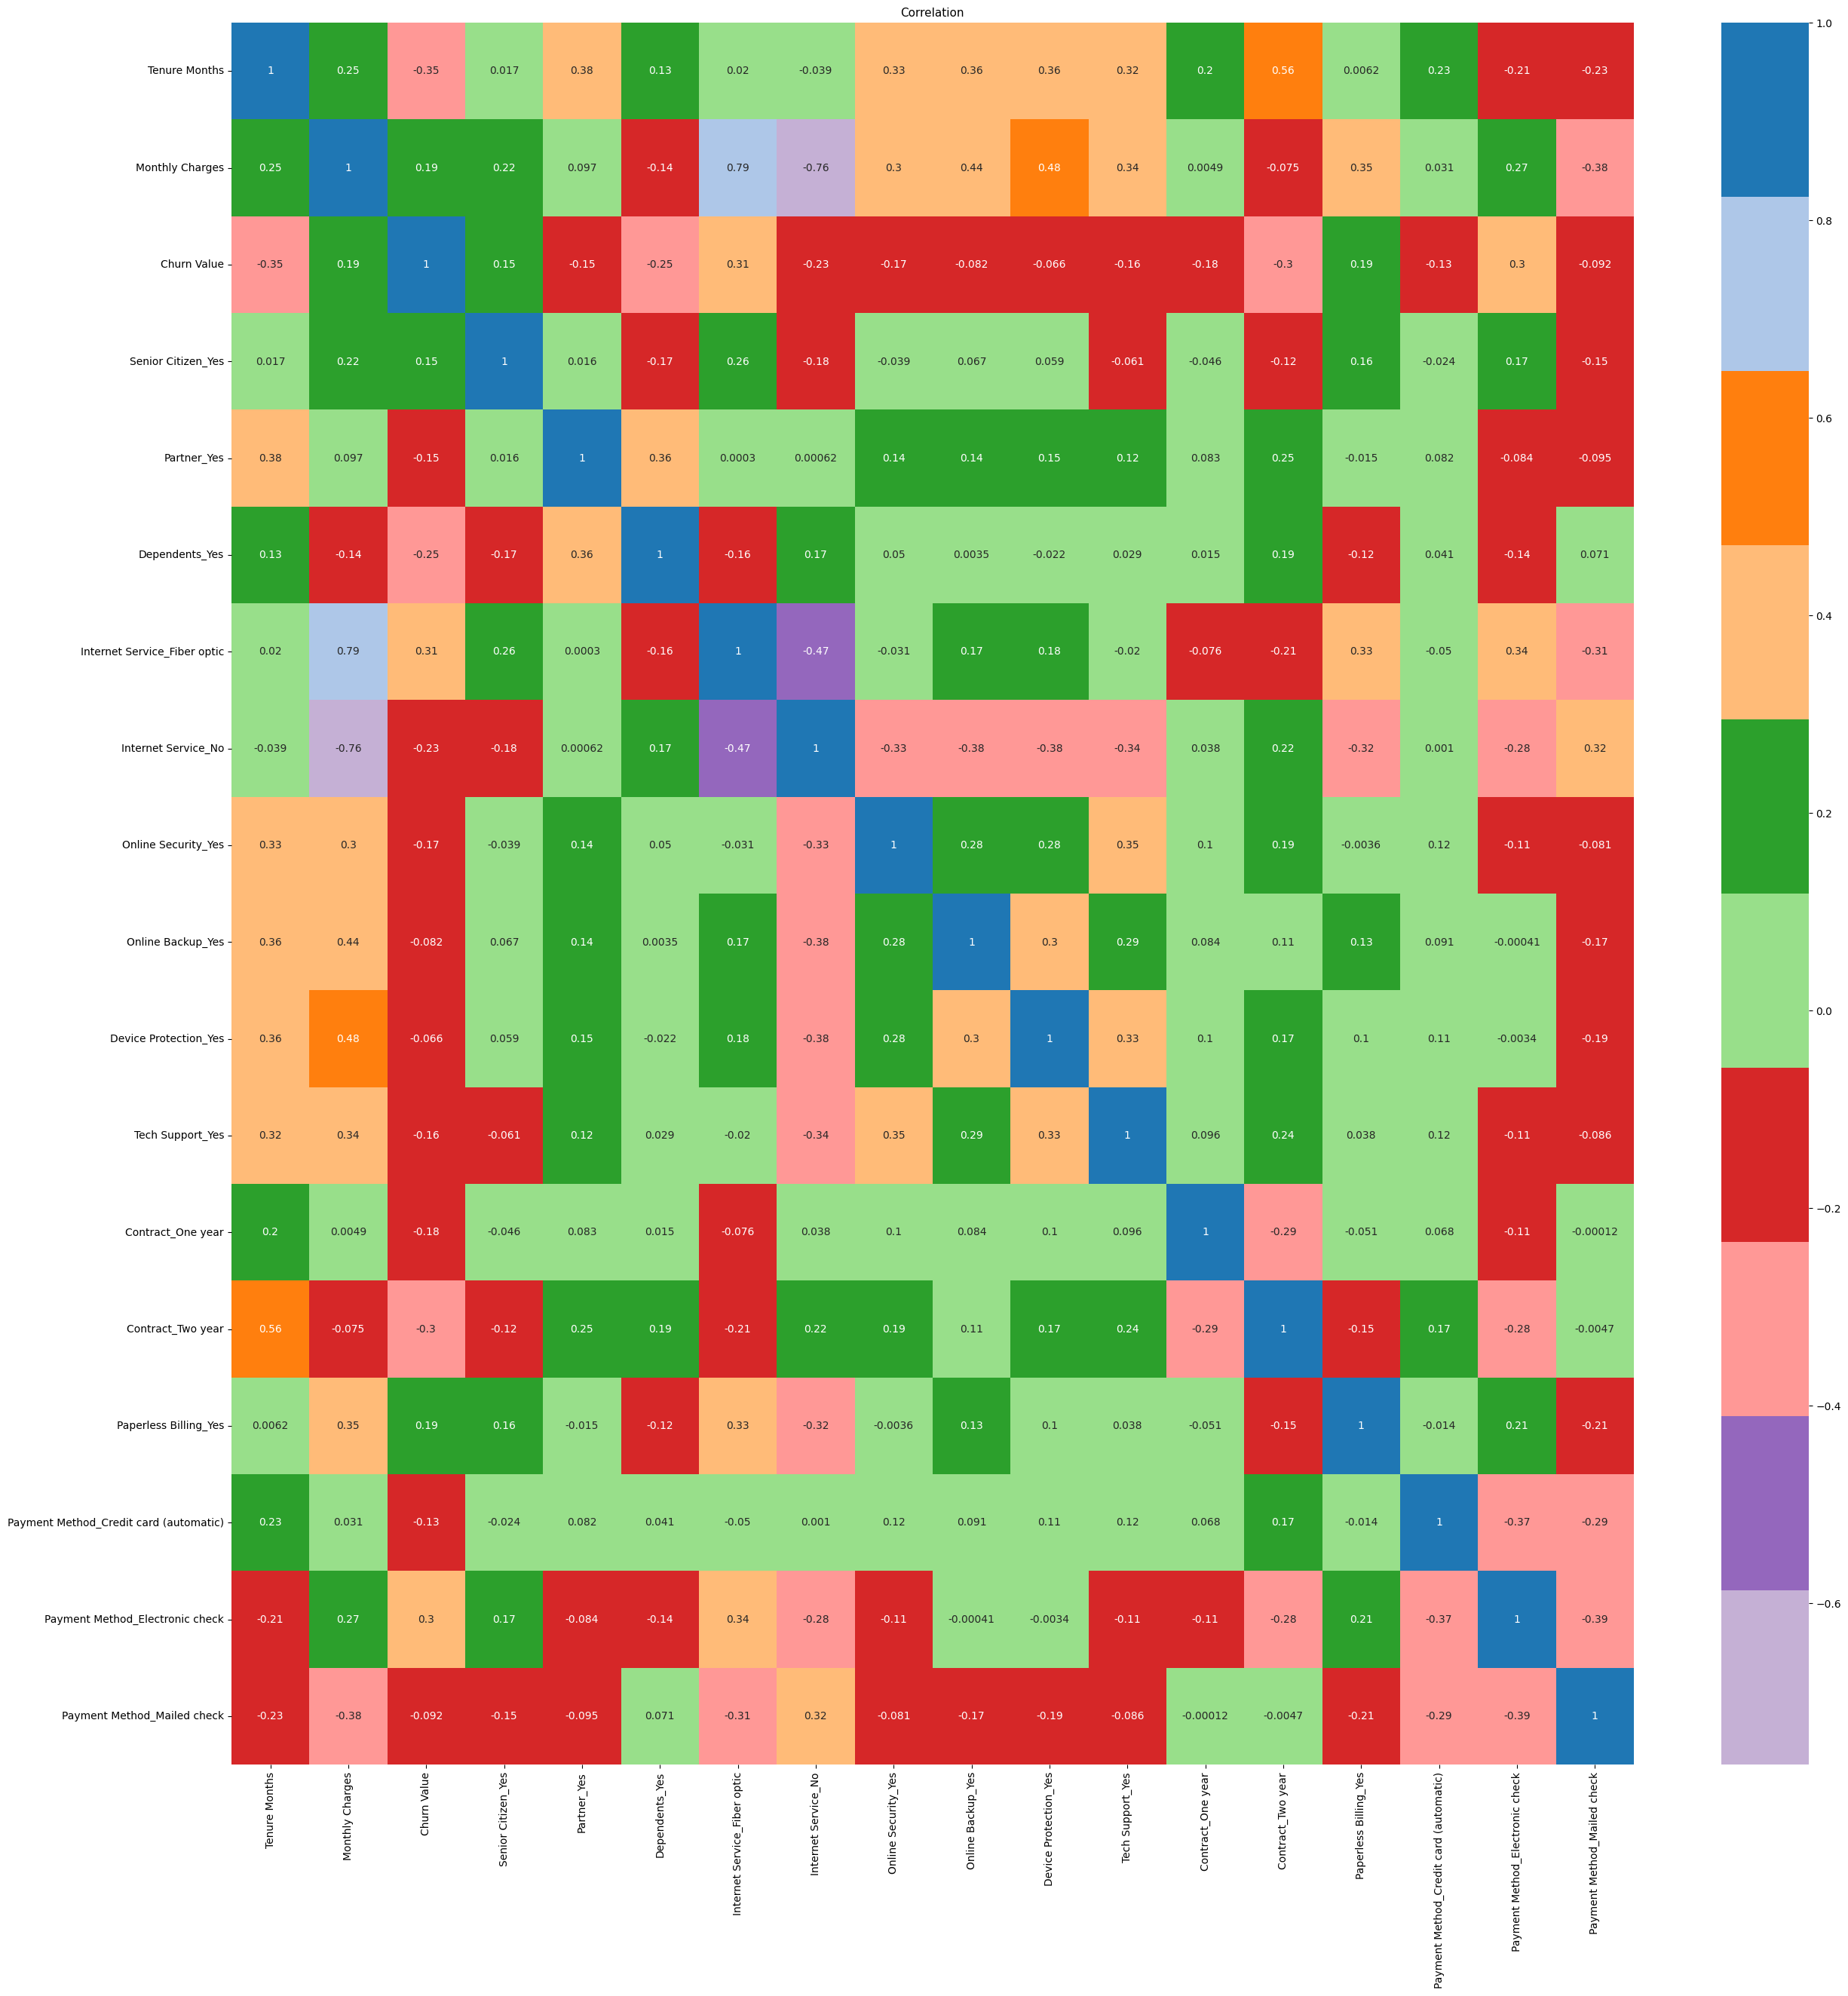

In [9]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (30, 30))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../graph/Correlation_heatmap.png')

# Show plot
plt.show()

---
### Save the correlation table to constant file
---

In [10]:
# Save dataframe as dictionary
features = corr_table['Absolute Correlation with Churn Value'].to_dict()

# Write dictionary in a constant file
with open('./features.py','w') as f :
    f.write('# Defining the correlation features dictionary\n')
    f.write(f'features = ')
    json.dump(features, f, indent=4)


---
### Selecting best features with differents Methods
---

**Create split train dataset**

In [11]:
# Separate independent variable from dependent variable
X = churn_df.drop(columns = ['Churn Value'])
y = churn_df['Churn Value']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.2, random_state = 1)

# Deleting test dataset to maek sure not to poluate data
del X_test, y_test

**Scale training dataset**

**SelectKBest Chi2**

In [12]:
# Initialize SelectKBest with chi2
selector = SelectKBest(score_func=chi2, k=len(corr_table))

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

**Save SelectKBest Chi2 features in constant file**

In [13]:
# Save SelectKBest features as dictionary
features = dict(zip(selector.get_feature_names_out(X.columns)[selector.scores_.argsort()][::-1], selector.scores_[selector.scores_.argsort()][::-1]))

# Write dictionary in a constant file
with open('./features.py','a') as f :
    f.write('\n\n# Defining the SelectKBest features dictionary\n')
    f.write(f'features_chi = ')
    json.dump(features, f, indent=4)


---
### Save the Engineered Features dataset
---

In [15]:
churn_df.to_excel(f'../data/churn_cleaned_featEng.xlsx', index=False)